In [3]:
import os

In [2]:
save_dir = 'results/'

In [1]:
import json
import numpy as np

# Load metrics
with open('data/metrics_history.json', 'r') as f:
    metrics = json.load(f)

print("="*60)
print("TRAINING SUMMARY")
print("="*60)
print(f"Total Epochs: {metrics['last_epoch'] + 1}")
print(f"Metrics tracked: {len(metrics['train_loss'])} epochs")
print()

# Best scores
print("BEST SCORES:")
print(f"  Lowest Train Loss: {min(metrics['train_loss']):.4f} (Epoch {np.argmin(metrics['train_loss'])})")
print(f"  Lowest Val Loss:   {min(metrics['val_loss']):.4f} (Epoch {np.argmin(metrics['val_loss'])})")
print(f"  Best BLEU-1:       {max(metrics['bleu1']):.4f} (Epoch {np.argmax(metrics['bleu1'])})")
print(f"  Best BLEU-4:       {max(metrics['bleu4']):.4f} (Epoch {np.argmax(metrics['bleu4'])})")
print(f"  Best METEOR:       {max(metrics['meteor']):.4f} (Epoch {np.argmax(metrics['meteor'])})")
print(f"  Best ROUGE-L:      {max(metrics['rouge_l']):.4f} (Epoch {np.argmax(metrics['rouge_l'])})")
print()

# Final scores
print("FINAL SCORES:")
print(f"  Train Loss:  {metrics['train_loss'][-1]:.4f}")
print(f"  Val Loss:    {metrics['val_loss'][-1]:.4f}")
print(f"  BLEU-1:      {metrics['bleu1'][-1]:.4f}")
print(f"  BLEU-4:      {metrics['bleu4'][-1]:.4f}")
print(f"  METEOR:      {metrics['meteor'][-1]:.4f}")
print(f"  ROUGE-L:     {metrics['rouge_l'][-1]:.4f}")

TRAINING SUMMARY
Total Epochs: 30
Metrics tracked: 30 epochs

BEST SCORES:
  Lowest Train Loss: 2.2324 (Epoch 29)
  Lowest Val Loss:   3.2013 (Epoch 22)
  Best BLEU-1:       0.1706 (Epoch 17)
  Best BLEU-4:       0.0000 (Epoch 6)
  Best METEOR:       0.1190 (Epoch 24)
  Best ROUGE-L:      0.1285 (Epoch 24)

FINAL SCORES:
  Train Loss:  2.2324
  Val Loss:    3.2156
  BLEU-1:      0.1385
  BLEU-4:      0.0000
  METEOR:      0.1018
  ROUGE-L:     0.1246


## Train and Validation Loss

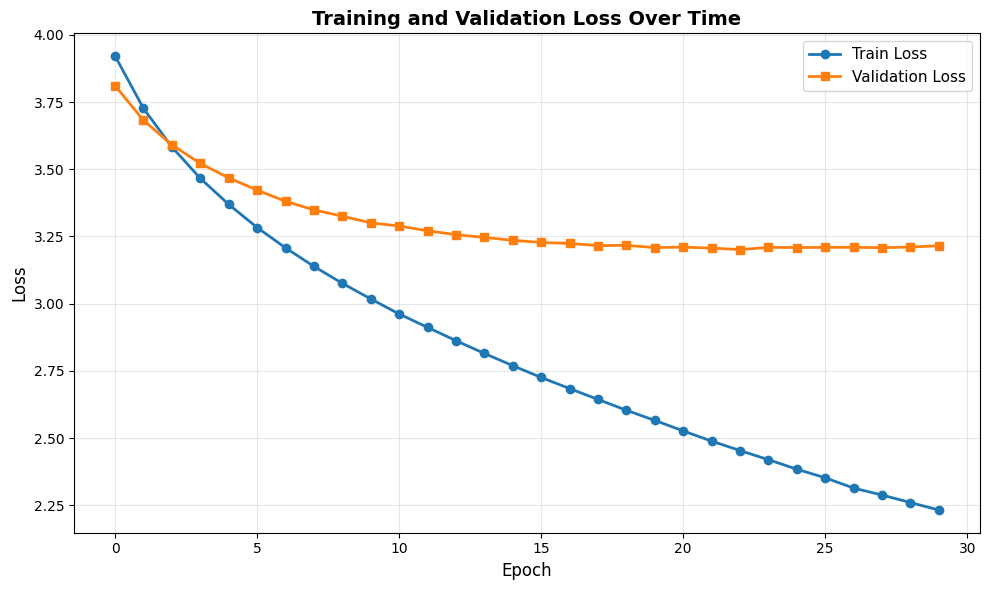

In [4]:
import matplotlib.pyplot as plt

epochs = range(len(metrics['train_loss']))

plt.figure(figsize=(10, 6))
plt.plot(epochs, metrics['train_loss'], label='Train Loss', marker='o', linewidth=2)
plt.plot(epochs, metrics['val_loss'], label='Validation Loss', marker='s', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Training and Validation Loss Over Time', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(save_dir, 'loss_curves.png'), dpi=300, bbox_inches='tight')
plt.show()

### BLEU Score

BLEU (Bilingual Evaluation Understudy) is a score used to evaluate the quality of machine-translated text by comparing it to human reference translations. The score ranges from 0 to 1, where 1 indicates a perfect match and 0 indicates no overlap. Higher scores generally mean better translations, with scores between 0.4 and 0.5 considered high quality. A good BLEU score depends on the specific task and data, but a score above 0.6 can be considered better than human-level in some contexts. 

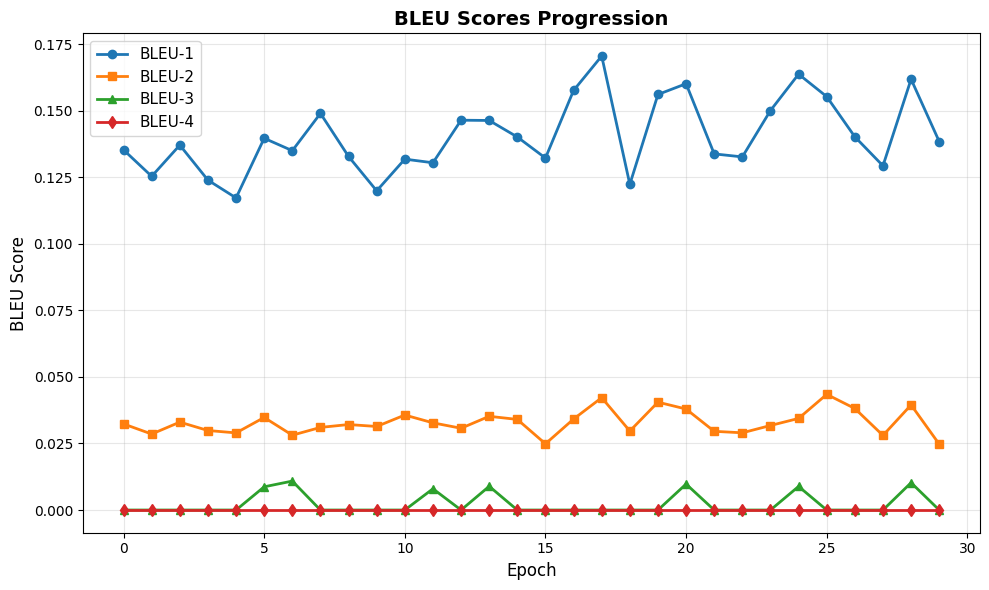

✓ Saved: bleu_scores.png


In [ ]:
epochs = range(len(metrics['bleu1']))

plt.figure(figsize=(10, 6))
plt.plot(epochs, metrics['bleu1'], label='BLEU-1', marker='o', linewidth=2)
plt.plot(epochs, metrics['bleu2'], label='BLEU-2', marker='s', linewidth=2)
plt.plot(epochs, metrics['bleu3'], label='BLEU-3', marker='^', linewidth=2)
plt.plot(epochs, metrics['bleu4'], label='BLEU-4', marker='d', linewidth=2)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('BLEU Score', fontsize=12)
plt.title('BLEU Scores Progression', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(save_dir,'bleu_scores.png'), dpi=300, bbox_inches='tight')
plt.show()

### METEOR and ROUGE-L

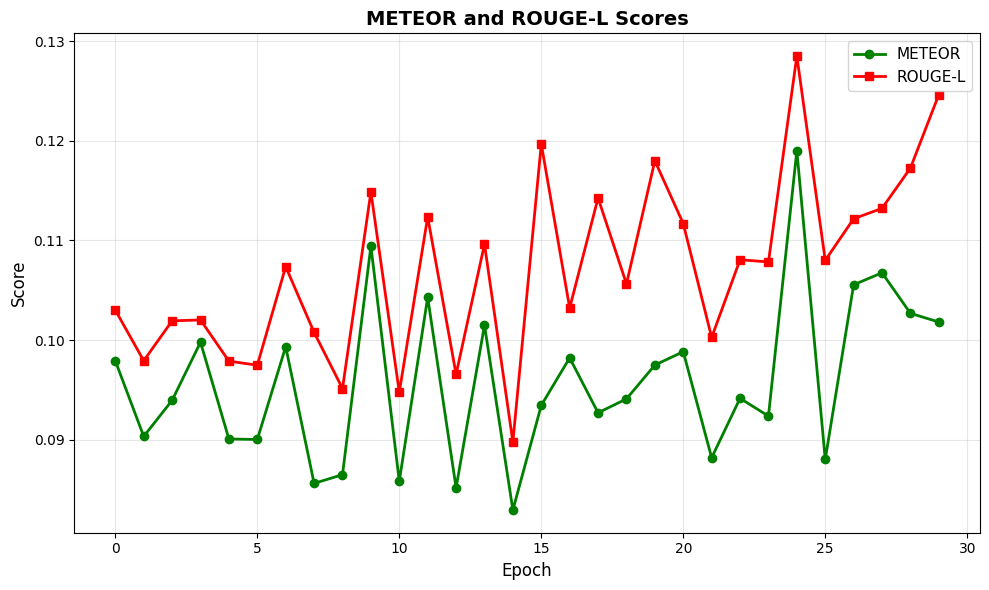

✓ Saved: meteor_rouge.png


In [ ]:
epochs = range(len(metrics['meteor']))

plt.figure(figsize=(10, 6))
plt.plot(epochs, metrics['meteor'], label='METEOR', marker='o', linewidth=2, color='green')
plt.plot(epochs, metrics['rouge_l'], label='ROUGE-L', marker='s', linewidth=2, color='red')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('METEOR and ROUGE-L Scores', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(save_dir,'meteor_rouge.png'), dpi=300, bbox_inches='tight')
plt.show()

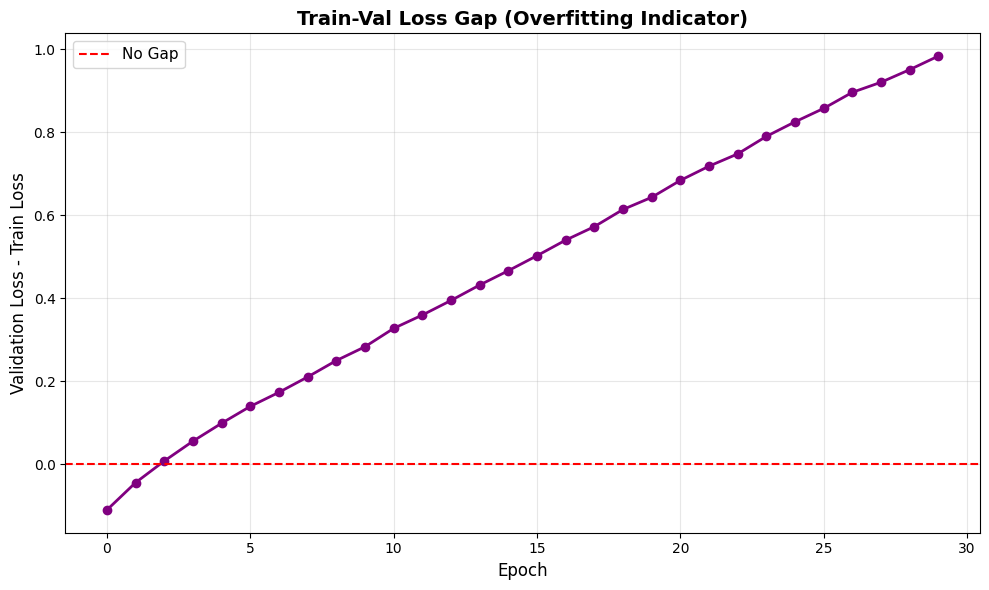

✓ Saved: overfitting_check.png

⚠️  Model may be overfitting (large train-val gap)


In [ ]:
# Calculate gap between train and val loss
loss_gap = [val - train for train, val in zip(metrics['train_loss'], metrics['val_loss'])]

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_gap, marker='o', linewidth=2, color='purple')
plt.axhline(y=0, color='red', linestyle='--', label='No Gap')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Validation Loss - Train Loss', fontsize=12)
plt.title('Train-Val Loss Gap (Overfitting Indicator)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(os.path.join(save_dir,'overfitting_check.png'), dpi=300, bbox_inches='tight')
plt.show()

print("✓ Saved: overfitting_check.png")
print()
if loss_gap[-1] > 0.1:
    print("Model may be overfitting (large train-val gap)")
elif loss_gap[-1] < 0:
    print("Model is generalizing well")
else:
    print("Minimal overfitting detected")